<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy import exp



N = 30

L0 = 2                                                 # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                      # physical domain              

rcol = 1/np.sqrt(L0**2+r**2)-r**2/(L0**2+r**2)**(3/2)          # dcol/dr

rrcol = -3*r/(L0**2+r**2)**(3/2)+3*r**3/(L0**2+r**2)**(5/2)     # d^2 col/dr^2


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])




for i in range(N+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi                                     

r0 = 0.5

A0 = 0.0001

sigma = 1

Phi_0 = A0*r**2*np.exp(-(r-r0)**2/sigma**2)            # Phi initial

rPhi_0 = 2*A0*r*np.exp(-(r-r0)**2/sigma**2)-2*A0*r**2*(r-r0)*np.exp(-(r-r0)**2/sigma**2)/sigma**2

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)



Phi = np.dot(a0, psi)      # approximative solution in t=0

rPhi= np.dot(a0, rpsi)

rrPhi = np.dot(a0, rrpsi)


In [103]:
np.shape(Phi)

(31,)

In [4]:
# Plot: Initial Conditions ph Phi

M = 3000

rplot = np.linspace(0,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

psiplot = SBplot[0:N+1,:] 

Phi_plot0 = 0.0001*rplot**2*np.exp(-(rplot-0.5)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, psiplot)

erro = (Phiplot - Phi_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


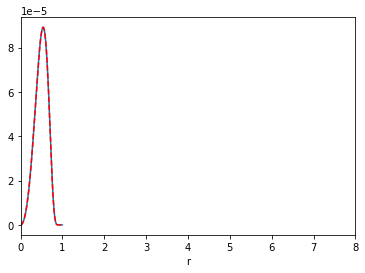

In [5]:
plt.plot(colplot, Phiplot, colplot, Phi_plot0, "--r")
plt.xlim(0,8)
plt.xlabel('r')
plt.show()

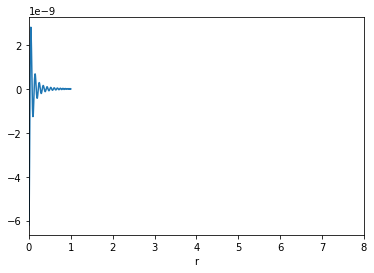

In [6]:
plt.plot(colplot, erro)
plt.xlim(0,8)
plt.xlabel('r')
plt.show()

In [7]:
# Initial values of PI:

Pi_0 = np.zeros([N+1])

b0 = np.dot(Pi_0, inv_psi)

Pi = np.dot(b0, psi) 

rPi= np.dot(b0, rpsi)

rrPi = np.dot(b0, rrpsi)

In [ ]:
Pi_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# Initial Chi: import from maple csv file

url = 'https://raw.githubusercontent.com/phmouras/Projeto_Pos/main/c0.csv'

df = pd.read_csv(url)

c0 = np.array(list(map(float,df)))
 
Chi = np.dot(c0, psi)

rChi = np.dot(c0, rpsi)

rrChi = np.dot(c0, rrpsi)

In [ ]:
c0

array([ 2.11244881e-09, -4.42284025e-11, -7.69005646e-11, -1.59616706e-11,
        1.33880981e-11,  1.90868466e-11, -1.38684232e-11, -4.63913559e-12,
        6.34900109e-12,  4.28748874e-13, -1.88058183e-12, -1.35566101e-13,
        5.46289003e-13,  8.19022919e-14, -1.38819769e-13, -5.19562172e-14,
        3.16778225e-14,  2.11131522e-14, -2.21775252e-15, -7.90529271e-15,
       -1.23255877e-15,  1.43612283e-15,  1.32346214e-15, -2.28348378e-16,
       -2.71610211e-16, -2.31127418e-16,  1.23462540e-16,  2.72337210e-17,
        5.02535192e-17, -3.98340467e-17, -7.49513688e-18])

In [9]:
# Initial values of Krr:

#Krr_0 = np.zeros([N+1])


SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])

rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])

rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


#inv_SB1 = np.linalg.inv(SB1)

#ck0 = np.dot(Krr_0, inv_SB1)


# Equation for Krr: momentum constraint

#res_krr = 2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi)

Matrix_Krr = 2*np.dot(rChi, SB1) + rSB1 + (3/r)*SB1 

inv_matrix_krr = np.linalg.inv(Matrix_Krr)

ck0 = np.dot(- np.dot(Pi,rPhi)*np.exp(4*Chi), inv_matrix_krr)

Krr = np.dot(ck0, SB1) 

rKrr = np.dot(ck0, rSB1)

rrKrr = np.dot(ck0, rrSB1)

In [ ]:
ck0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
# Equation for Alpha:


# Initial values of alpha:

#Alpha_0 = np.zeros([N+1])

V = 0

#res_alpha = rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V)

Matrix_Alpha = rrpsi + 2*np.dot(1/r + rrChi, rpsi) - np.dot(3/2*np.exp(-4*Chi)*Krr**2,psi) - np.dot(np.exp(4*Chi)*(Pi**2 - V),psi) 

inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)

al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)

Alpha = 1 + np.dot(al0, psi)

rAlpha = np.dot(al0, rpsi)

rrAlpha = np.dot(al0, rrpsi)


In [182]:
Alpha

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:

# Initial values of beta:

#Beta_0 = np.zeros([N+1])

#be0 = np.dot(Beta_0, inv_psi)

#Beta = np.dot(be0, psi)
#rBeta = np.dot(be0, rpsi)
#rrBeta = np.dot(be0, rrpsi)
#rBeta_r = np.dot(be0, rpsi/r)

# Equation for Beta:

#res_beta = rBeta_r-3/2/r*Alpha*np.exp(-4*Chi)*Krr

Matrix_Beta = rpsi/r - psi/r**2

inv_matrix_beta = np.linalg.inv(Matrix_Beta)

be0 = np.dot(np.dot(3*Alpha*np.exp(-4*Chi),Krr)/(2*r) , inv_matrix_beta)

Beta = np.dot(be0, psi)

rBeta = np.dot(be0, rpsi)

rrBeta = np.dot(be0, rrpsi)

In [ ]:
Pi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Field  Equations

In [12]:
# Equation for Phi: 

da = np.dot(np.dot(Alpha,Pi)*np.exp(-6*Chi) + np.dot(Beta, rPhi), inv_psi)

da

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# Equation for Pi: KG equation

db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)

db

array([ 1.72891094e-04, -9.14324705e-05, -3.91324051e-05,  9.43190243e-05,
       -2.42130993e-05, -4.29939132e-05,  2.21612909e-05,  1.25658892e-05,
       -5.34292421e-06, -6.32180775e-06,  1.23072463e-06,  1.62905982e-06,
        1.04806194e-06, -9.75827538e-07,  1.48900480e-08, -4.65125824e-07,
        5.58811108e-07, -3.20494874e-07,  4.00060072e-07, -4.18554905e-07,
        3.52855584e-07, -3.61694772e-07,  3.50708086e-07, -3.20045692e-07,
        3.05515516e-07, -2.80441583e-07,  2.48373336e-07, -2.15569292e-07,
        1.73567821e-07, -1.23478505e-07,  6.55683417e-08])

In [14]:
# Equation for Chi:

dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    

dc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# Runge Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])
chi_set = np.zeros([It,M])
pi_set = np.zeros([It,M])



for i in range(It):
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   # Pi
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    # Chi
  da = np.dot(np.dot(Alpha,Pi)*np.exp(-6*Chi) + np.dot(Beta, rPhi), inv_psi)   # Phi
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)  
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  rrPi = np.dot(b0 + N1/2, rrpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*np.dot(rChi, SB1) + rSB1 + (3/r)*SB1 
  ck0 = np.dot(- np.dot(Pi,rPhi)*np.exp(4*Chi), inv_matrix_krr)
  Matrix_Alpha = rrpsi + 2*np.dot(1/r + rrChi, rpsi) - np.dot(3/2*np.exp(-4*Chi)*Krr**2,psi) - np.dot(np.exp(4*Chi)*(Pi**2 - V),psi) 
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)
  Matrix_Beta = rpsi/r - psi/r**2
  be0 = np.dot(np.dot(3*Alpha*np.exp(-4*Chi),Krr)/(2*r) , inv_matrix_beta)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Beta = np.dot(be0, psi)
  rBeta = np.dot(be0, rpsi)
  rrBeta = np.dot(be0, rrpsi)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(np.dot(Alpha,Pi)*np.exp(-6*Chi) + np.dot(Beta, rPhi), inv_psi)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  rrPi = np.dot(b0 + N2/2, rrpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*np.dot(rChi, SB1) + rSB1 + (3/r)*SB1 
  ck0 = np.dot(- np.dot(Pi,rPhi)*np.exp(4*Chi), inv_matrix_krr)
  Matrix_Alpha = rrpsi + 2*np.dot(1/r + rrChi, rpsi) - np.dot(3/2*np.exp(-4*Chi)*Krr**2,psi) - np.dot(np.exp(4*Chi)*(Pi**2 - V),psi) 
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)
  Matrix_Beta = rpsi/r - psi/r**2
  be0 = np.dot(np.dot(3*Alpha*np.exp(-4*Chi),Krr)/(2*r) , inv_matrix_beta)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Beta = np.dot(be0, psi)
  rBeta = np.dot(be0, rpsi)
  rrBeta = np.dot(be0, rrpsi)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(np.dot(Alpha,Pi)*np.exp(-6*Chi) + np.dot(Beta, rPhi), inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  rrPi = np.dot(b0 + N3, rrpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*np.dot(rChi, SB1) + rSB1 + (3/r)*SB1 
  ck0 = np.dot(- np.dot(Pi,rPhi)*np.exp(4*Chi), inv_matrix_krr)
  Matrix_Alpha = rrpsi + 2*np.dot(1/r + rrChi, rpsi) - np.dot(3/2*np.exp(-4*Chi)*Krr**2,psi) - np.dot(np.exp(4*Chi)*(Pi**2 - V),psi) 
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)
  Matrix_Beta = rpsi/r - psi/r**2
  be0 = np.dot(np.dot(3*Alpha*np.exp(-4*Chi),Krr)/(2*r) , inv_matrix_beta)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Beta = np.dot(be0, psi)
  rBeta = np.dot(be0, rpsi)
  rrBeta = np.dot(be0, rrpsi)
  db = np.dot(np.dot(Beta, rPi) + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(np.dot(Beta,rChi) + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(np.dot(Alpha,Pi)*np.exp(-6*Chi) + np.dot(Beta, rPhi), inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  phi_set[i,:] = np.dot(a0, psiplot)

In [129]:
#a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
#b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
#c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
#phi_set[i,:] = np.dot(a0, psiplot)
#pi_set[i,:] = np.dot(b0, psiplot)
#chi_set[i,:] = np.dot(c0, psiplot)

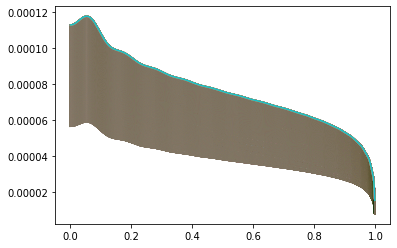

In [139]:
for i in range(It):
  plt.plot(colplot, chi_set[i,:])

CalledProcessError: ignored

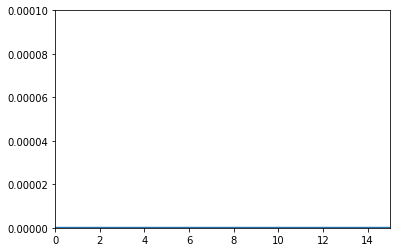

In [17]:
# Animation plot fo Chi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (0, 0.0001))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = chi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=2, blit=True)

HTML(anim.to_html5_video())

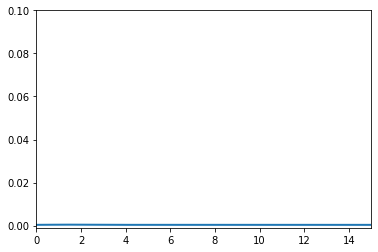

In [21]:
# Animation plot for Phi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (-0.001, 00000.1))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=2, blit=True)

HTML(anim.to_html5_video())

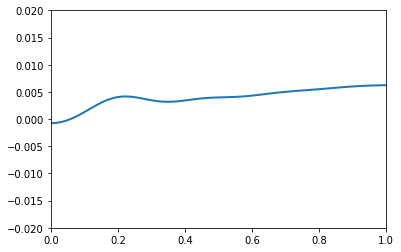

In [150]:
# Animation plot for Pi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim = (-0.02, 0.02))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = pi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=2, blit=True)

HTML(anim.to_html5_video())